In [64]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tqdm import tqdm

In [65]:
from random import shuffle, randint

In [66]:
model = KeyedVectors.load_word2vec_format('../sup_codes_words_emb128_iters10_sub100/joined.txt')

In [23]:
import random

In [28]:
random.choices(range(128), k=2)

[59, 57]

In [31]:
labels = []
vecs = []
for word in model.wv.vocab:
    vecs.append(model[word])
    labels.append(word)

In [69]:
def dimred_plot(model, method='pca'):
    "Creates and TSNE model and plots it"
    labels = []
    vecs = []

    print("populate arrays")
    for word in model.wv.vocab:
        vecs.append(model[word])
        labels.append(word)
    
    print("apply dimensionality reduction using %s" % method)
    if method == 'tsne':
        drmodel = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
        new_values = drmodel.fit_transform(vecs)
    elif method == 'pca':
        drmodel = PCA(n_components=2, random_state=23)
        new_values = drmodel.fit_transform(vecs)
    elif method == 'rand2':
        inds = random.choices(range(128), k=2)
        new_values = [vec[inds] for vec in vecs]

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    print("plot...")
    plt.figure(figsize=(16, 16))
    ixs = list(range(len(x)))
    shuffle(ixs)
    for i in ixs[:5000]:
        color = 'r' if '_' in labels[i] else 'b'
        plt.scatter(x[i],y[i], c=color)
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    plt.show()

populate arrays
apply dimensionality reduction using pca
plot...


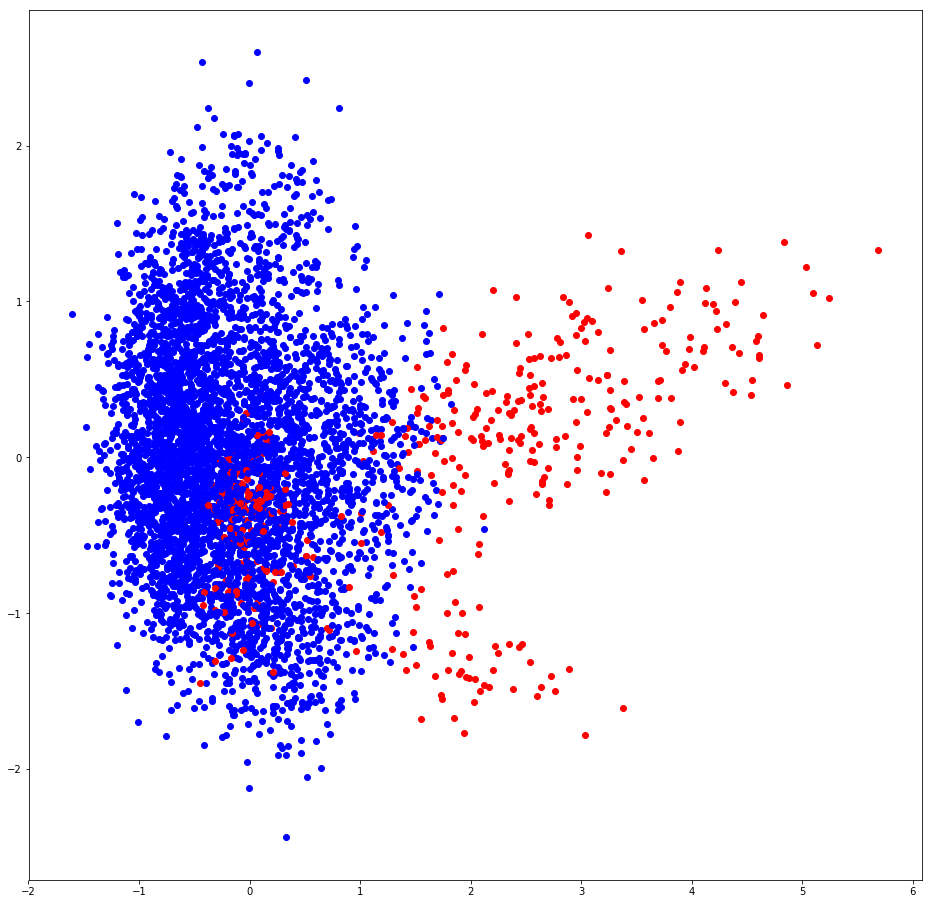

In [70]:
dimred_plot(model)

In [71]:
model2 = KeyedVectors.load_word2vec_format('../../../../../data/unaligned.txt')

populate arrays
apply dimensionality reduction using pca
plot...


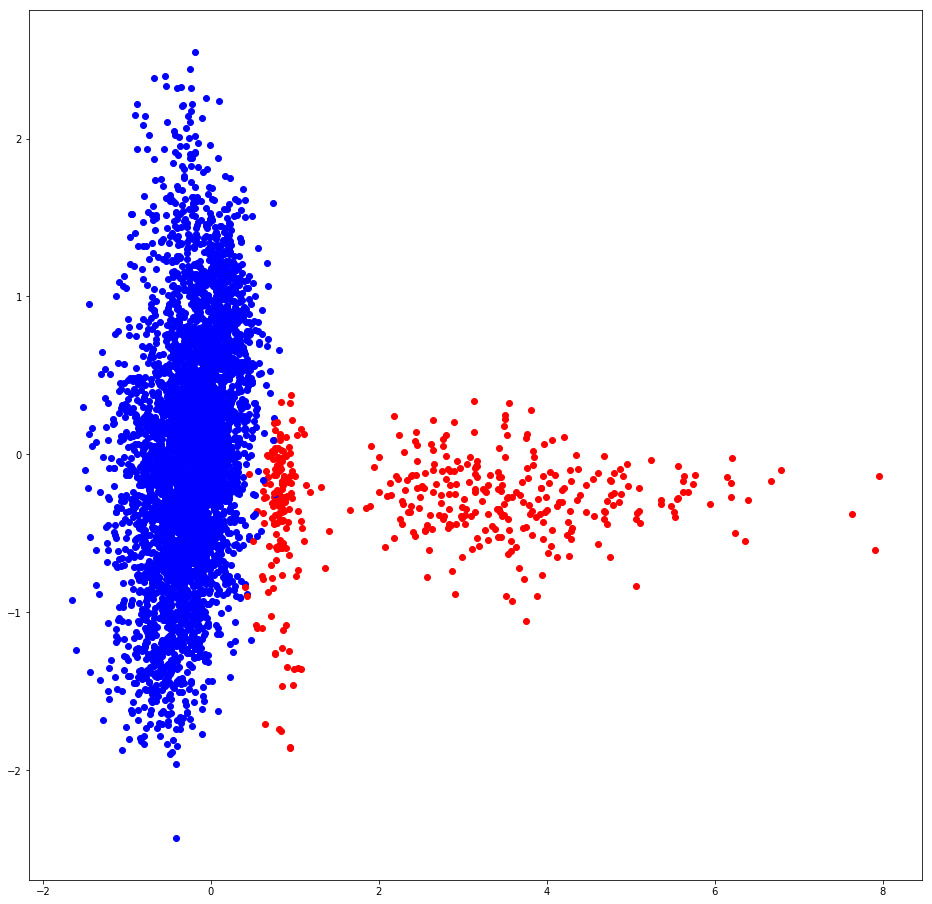

In [72]:
dimred_plot(model2, method='pca')